# Bayesian blocks

[Bayesian block representations](https://arxiv.org/pdf/1207.5578.pdf) produce a piecewise-uniform density estimate with Bayesian underpinnings.

The [implementation in astropy](https://github.com/astropy/astropy/blob/master/astropy/stats/bayesian_blocks.py) is the best that we've found:

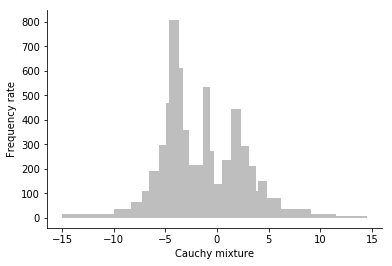

In [5]:
from astropy import stats
import numpy as np
import shmistogram as sh
%matplotlib inline

# Simulate a mixture of Cauchy distributions
x = sh.simulations.cauchy_mixture()

# Compute a Bayesian block representation
bin_edges = stats.bayesian_blocks(x, gamma=0.01)
counts_per_bin = np.histogram(x, bins=bin_edges)[0]

# Plot the bins such that the area in each bin is proportional
#  to the mass (such as counts) in that bin
_ = sh.plot.bins(edges=bin_edges, masses=counts_per_bin, name='Cauchy mixture')